# Predicting Stock Outperformance using Financial Ratios

In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a **non-probabilistic binary linear classifier** (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped ***so that the examples of the separate categories are divided by a clear gap that is as wide as possible***. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall. This gap is also called maximum margin and the SVM classifier is called ***maximum margin clasifier***.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

## Import libraries and load data

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get the Data

The data was collected from AB Capital's Bloomberg. 

In [163]:
df = pd.read_csv('pseifinancialratios.csv')

In [142]:
df.keys()

Index(['Company', 'Quarters', 'Performance', 'Earnings.per.Share',
       'Price.to.Sales', 'Operating.Margins', 'Price.to.Book', 'ROE', 'ROA',
       'PE', 'Debt.to.Equity', 'Book.Value.Per.Share', 'Net.Debt.to.EBITDA',
       'Current.Ratio', 'Profit.Margin', 'Total.Debt.to.Total.Asset',
       'Operating.Margin', 'Return.on.Capital', 'FCF.to.Basic.Share',
       'Tangible.Book.value.per.Share'],
      dtype='object')

## Set up the DataFrame

In [143]:
df.describe()

,Performance,Earnings.per.Share,Price.to.Sales,Operating.Margins,Price.to.Book,ROE,ROA,PE,Debt.to.Equity,Book.Value.Per.Share,Net.Debt.to.EBITDA,Current.Ratio,Profit.Margin,Total.Debt.to.Total.Asset,Operating.Margin,Return.on.Capital,Tangible.Book.value.per.Share
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.470930,6.158692,2.058488,18.824709,1.966221,19.692878,141387.903256,20.066105,96.626279,174.125291,3.098227,1.578488,13.299797,35.129622,18.824709,8.644041,141.140378
std,0.499881,12.367309,2.087610,12.688316,1.340436,13.565596,171335.595970,17.347403,59.045012,267.172273,4.416816,0.859743,9.618380,13.025625,12.688316,3.994895,234.117839
min,0.000000,-1.590000,0.030000,-8.710000,0.220000,-4.780000,-251383.760000,2.750000,7.130000,0.440000,-21.600000,0.300000,-19.860000,4.220000,-8.710000,1.400000,-7.570000
25%,0.000000,0.210000,0.890000,9.027500,0.922500,10.575000,16168.735000,10.362500,52.752500,11.362500,1.297500,1.095000,6.692500,26.062500,9.027500,5.875000,9.695000
50%,0.000000,0.700000,1.545000,16.870000,1.525000,17.295000,110710.000000,15.350000,79.905000,30.870000,2.745000,1.445000,11.820000,34.930000,16.870000,8.095000,19.470000
75%,1.000000,5.942500,2.440000,24.875000,2.825000,24.107500,240675.170000,24.807500,127.690000,316.702500,5.047500,1.840000,17.230000,44.555000,24.875000,10.132500,196.527500
max,1.000000,100.000000,13.280000,55.270000,8.530000,100.710000,820100.000000,150.680000,294.560000,1088.660000,12.610000,5.780000,66.170000,60.160000,55.270000,28.390000,981.220000


**Is there any missing data?**

In [97]:
np.sum(pd.isnull(df).sum()) # Sum of the count of null objects in all columns of data frame

0

**What are the 'target' data in the data set?**

Here, 1 indicates that a company will outperform the stock index and 0 otherwise.

In [98]:
df['Performance']

0      1
1      0
2      0
3      0
4      1
      ..
339    0
340    0
341    1
342    1
343    1
Name: Performance, Length: 344, dtype: int64

** Adding the target data to the DataFrame**

## Exploratory Data Analysis


### Check the relative counts of benign (0) vs malignant (1) cases of cancer

<AxesSubplot:xlabel='Performance', ylabel='count'>

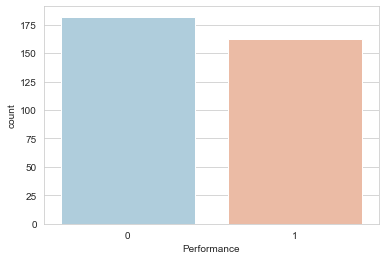

In [99]:
sns.set_style('whitegrid')
sns.countplot(x='Performance',data=df,palette='RdBu_r')

### Run a 'for' loop to draw boxlots of all the mean features (first 10 columns) for '0' and '1' CANCER OUTCOME

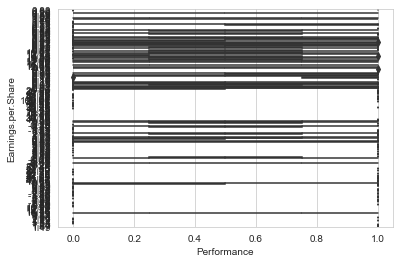

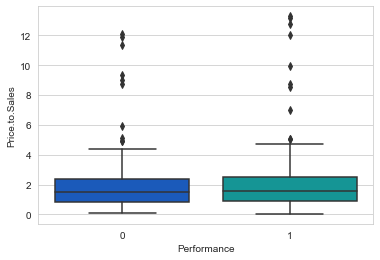

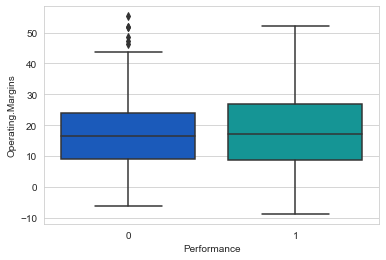

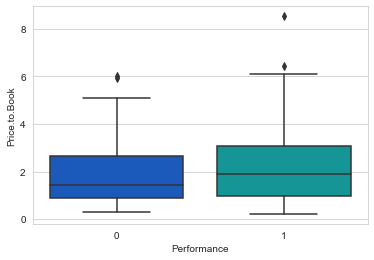

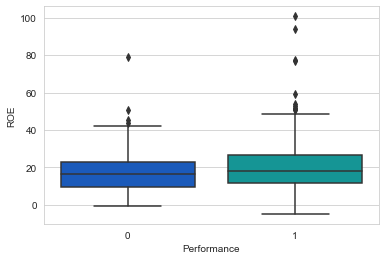

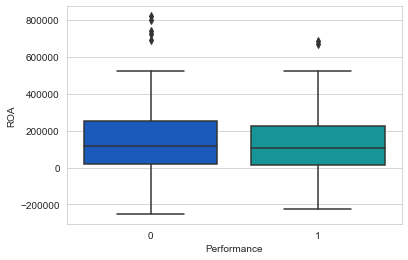

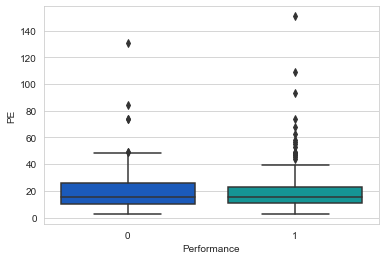

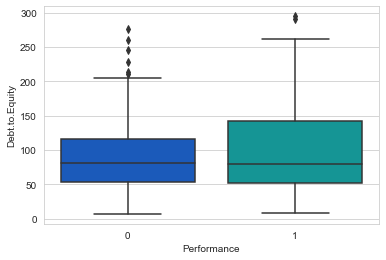

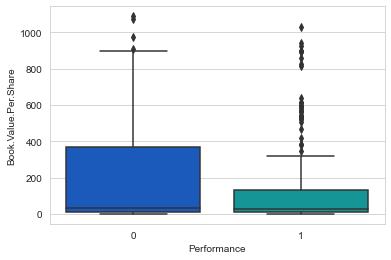

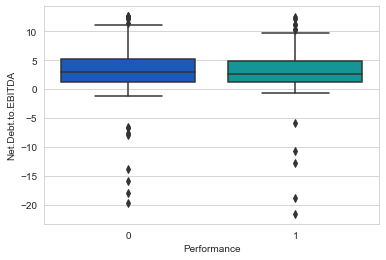

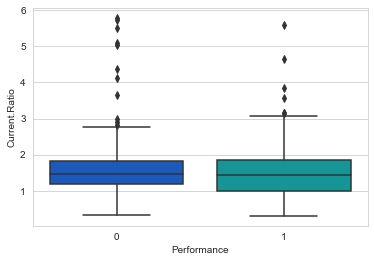

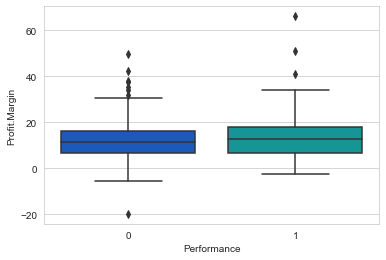

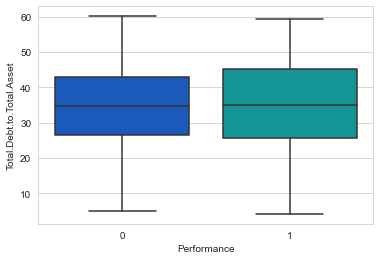

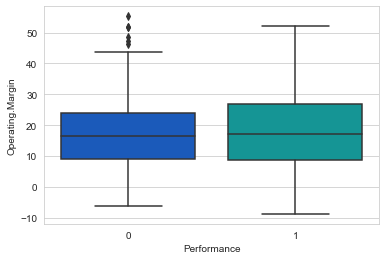

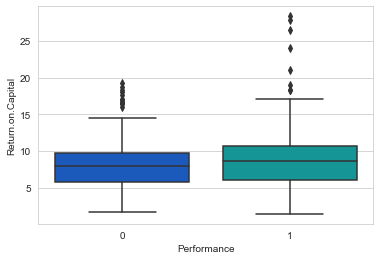

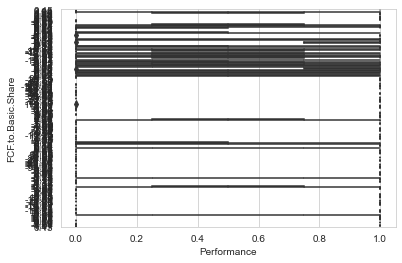

<Figure size 432x288 with 0 Axes>

In [101]:
l=list(df.iloc[:,3:20])
for i in range(len(l)-1):
    sns.boxplot(x='Performance',y=l[i], data=df, palette='winter')
    plt.figure()

### Not all the features seperate out the stock outperformance predictions equally clearly.
**For example, from the following two plots it is clear that smaller area generally is indicative of positive cancer detection, while nothing concrete can be said from the plot of mean smoothness**

Text(0.5, 1.0, 'Performance cases as a function of mean smoothness')

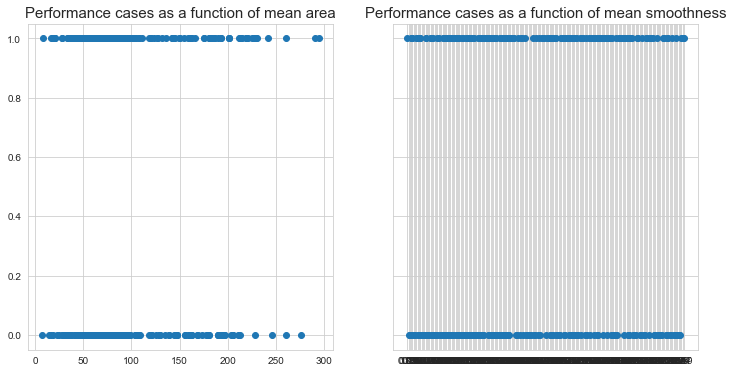

In [102]:
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))
ax1.scatter(df['Debt.to.Equity'],df['Performance'])
ax1.set_title("Performance cases as a function of mean area", fontsize=15)
ax2.scatter(df['Earnings.per.Share'],df['Performance'])
ax2.set_title("Performance cases as a function of mean smoothness", fontsize=15)

## Training and prediction

### Train Test Split

In [160]:
df.keys()

Index(['Company', 'Quarters', 'Performance', 'Earnings.per.Share',
       'Price.to.Sales', 'Operating.Margins', 'Price.to.Book', 'ROE', 'ROA',
       'PE', 'Debt.to.Equity', 'Book.Value.Per.Share', 'Net.Debt.to.EBITDA',
       'Current.Ratio', 'Profit.Margin', 'Total.Debt.to.Total.Asset',
       'Operating.Margin', 'Return.on.Capital', 'FCF.to.Basic.Share',
       'Tangible.Book.value.per.Share'],
      dtype='object')

In [185]:
df_target = df.iloc[:,2] # Define a dataframe with only target results i.e. cancer detections
df_feat = df.iloc[:,3:20]

In [186]:
from sklearn.model_selection import train_test_split

In [222]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.30, random_state=0)

### Train the Support Vector Classifier

In [223]:
from sklearn.svm import SVC

In [224]:
model = SVC()

In [225]:
model.fit(X_train,y_train)

SVC()

### Predictions and Evaluations

In [226]:
predictions = model.predict(X_test)
predictions

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [227]:
from sklearn.metrics import classification_report,confusion_matrix

**Notice that we are classifying everything into a single class! This means our model needs to have it parameters adjusted (it may also help to normalize the data)**

In [228]:
pd.DataFrame(confusion_matrix(y_test,predictions))

,0,1
0,17,45
1,8,34


**As expected, the classification report card is bad**

In [230]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.27      0.39        62
           1       0.43      0.81      0.56        42

    accuracy                           0.49       104
   macro avg       0.56      0.54      0.48       104
weighted avg       0.58      0.49      0.46       104



## Gridsearch

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

In [233]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [234]:
from sklearn.model_selection import GridSearchCV

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [235]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

In [237]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [238]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [239]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

**Then you can re-run predictions on this grid object just like you would with a normal model**

In [240]:
grid_predictions = grid.predict(X_test)

**Now print the confusion matrix to see improved predictions**

In [241]:
print(confusion_matrix(y_test,grid_predictions))

[[ 4 58]
 [ 2 40]]


**Classification report shows improved F1-score**

In [242]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.67      0.06      0.12        62
           1       0.41      0.95      0.57        42

    accuracy                           0.42       104
   macro avg       0.54      0.51      0.34       104
weighted avg       0.56      0.42      0.30       104



### Another set of parameters for GridSearch

In [243]:
param_grid = {'C': [50,75,100,125,150], 'gamma': [1e-2,1e-3,1e-4,1e-5,1e-6], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(tol=1e-5),param_grid,refit=True,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVC(tol=1e-05),
             param_grid={'C': [50, 75, 100, 125, 150],
                         'gamma': [0.01, 0.001, 0.0001, 1e-05, 1e-06],
                         'kernel': ['rbf']},
             verbose=1)

In [244]:
grid.best_estimator_

SVC(C=50, gamma=0.01, tol=1e-05)

In [245]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[ 6 56]
 [ 2 40]]
